In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [3]:
data = pd.read_csv('Train.csv')

In [4]:
data.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [5]:
print(data.isnull().sum())

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64


In [6]:
data.dtypes

ID                      int64
Warehouse_block        object
Mode_of_Shipment       object
Customer_care_calls     int64
Customer_rating         int64
Cost_of_the_Product     int64
Prior_purchases         int64
Product_importance     object
Gender                 object
Discount_offered        int64
Weight_in_gms           int64
Reached.on.Time_Y.N     int64
dtype: object

In [7]:
data.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


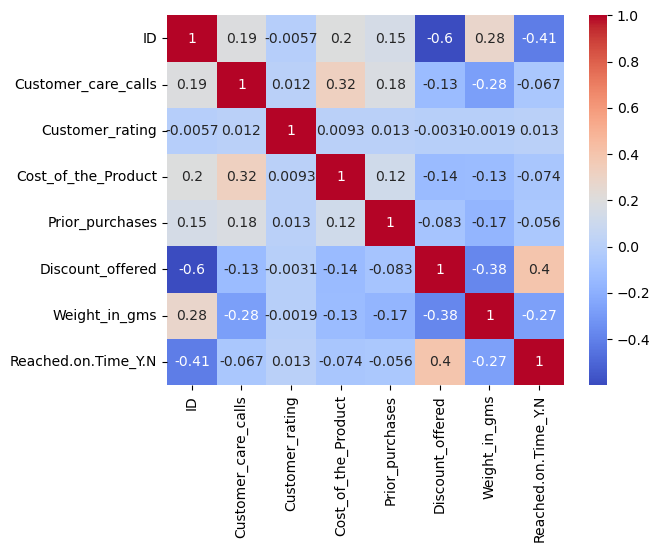

In [8]:
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

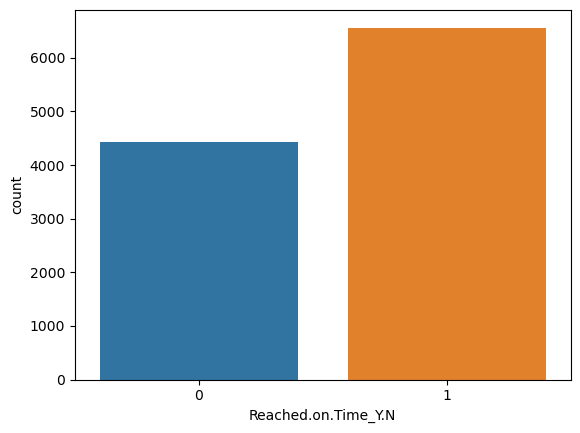

In [9]:
sns.countplot(x='Reached.on.Time_Y.N', data=data)
plt.show()

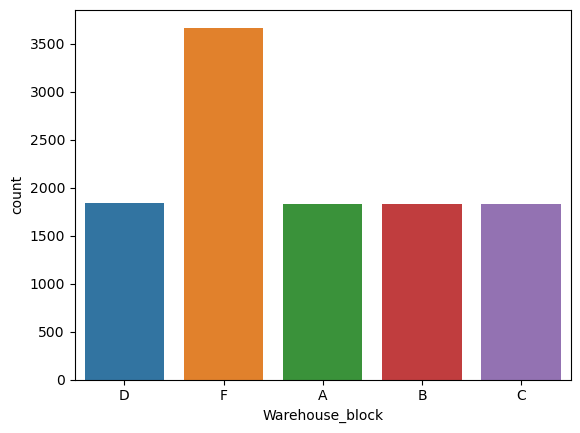

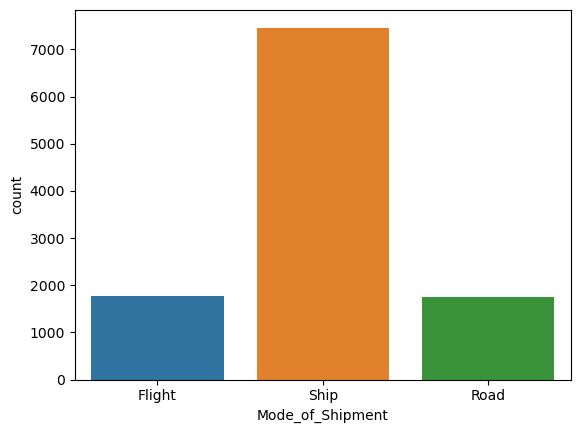

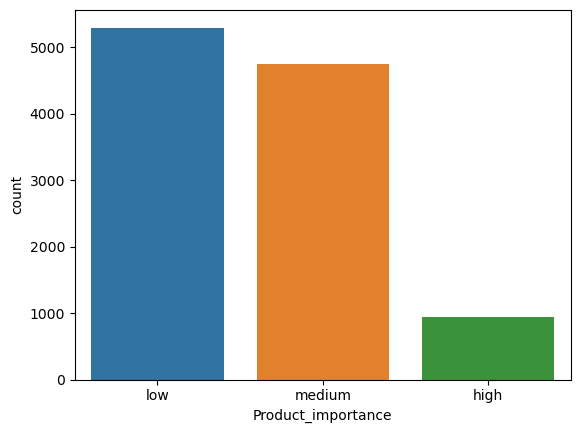

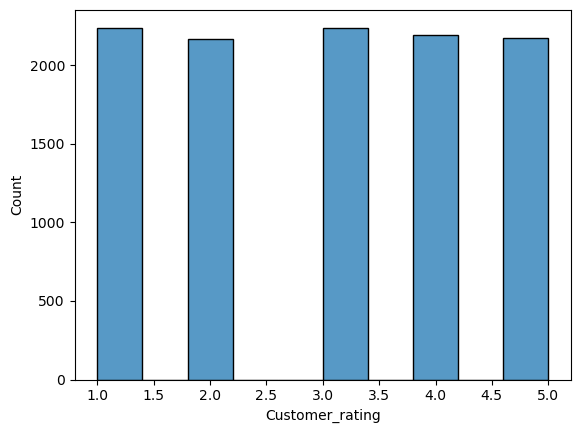

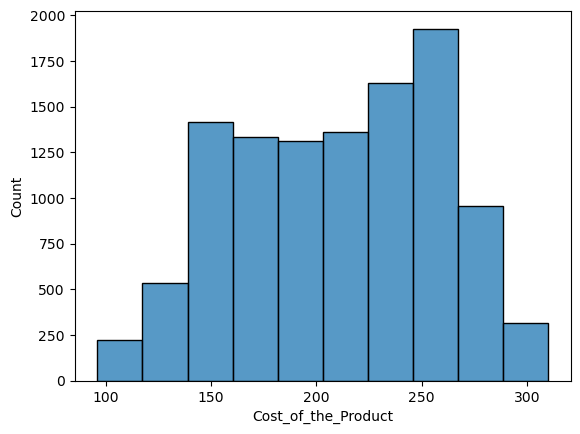

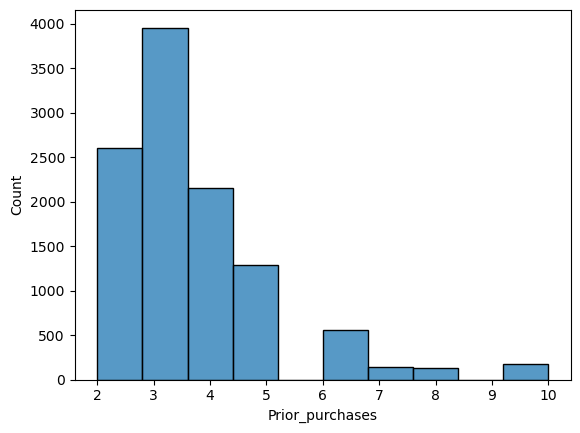

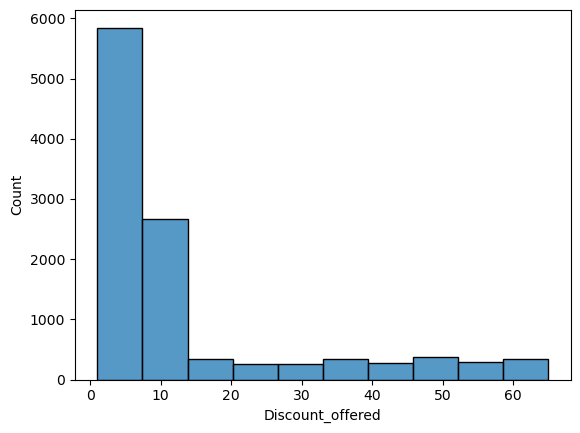

In [10]:
# Distribution of the categorical variables
sns.countplot(x='Warehouse_block', data=data)
plt.show()

sns.countplot(x='Mode_of_Shipment', data=data)
plt.show()

sns.countplot(x='Product_importance', data=data)
plt.show()

# Distribution of the numerical variables
sns.histplot(x='Customer_rating', data=data, bins=10)
plt.show()

sns.histplot(x='Cost_of_the_Product', data=data, bins=10)
plt.show()

sns.histplot(x='Prior_purchases', data=data, bins=10)
plt.show()

sns.histplot(x='Discount_offered', data=data, bins=10)
plt.show()








In [11]:
# Feature Engineering

# 1. Convert Warehouse_block, Mode_of_Shipment, and Product_importance to one-hot encoded variables
data = pd.get_dummies(data, columns=['Warehouse_block', 'Mode_of_Shipment', 'Product_importance'])

# 3. Create a new feature by subtracting Discount_offered from Cost_of_the_Product
data['DiscountedPrice'] = data['Cost_of_the_Product'] - data['Discount_offered']

# 4. Create a new feature by dividing Customer_rating by Customer_care_calls
data['RatingPerCall'] = data['Customer_rating'] / data['Customer_care_calls']

# Convert categorical variables into numerical using label encoding
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])

# Drop unnecessary columns
data = data.drop(['ID'], axis=1)

# Preview the cleaned dataset
data.head()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Warehouse_block_A,Warehouse_block_B,...,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_high,Product_importance_low,Product_importance_medium,DiscountedPrice,RatingPerCall
0,4,2,177,3,0,44,1233,1,0,0,...,1,0,1,0,0,0,1,0,133,0.50
1,4,5,216,2,1,59,3088,1,0,0,...,0,1,1,0,0,0,1,0,157,1.25
2,2,2,183,4,1,48,3374,1,1,0,...,0,0,1,0,0,0,1,0,135,1.00
3,3,3,176,4,1,10,1177,1,0,1,...,0,0,1,0,0,0,0,1,166,1.00
4,2,2,184,3,0,46,2484,1,0,0,...,0,0,1,0,0,0,0,1,138,1.00


In [12]:
# create a copy of the dataframe
data2 = data.copy()

# Create the Target column and reset the index
target = data2['Reached.on.Time_Y.N'].reset_index(drop=True)

# Create dataframe without Target column and reset index 
features = data2.drop('Reached.on.Time_Y.N', axis=1).reset_index(drop=True)

In [13]:
from sklearn.preprocessing import StandardScaler

# Separate the target column 'Reached.on.Time_Y.N' from the rest of the columns
y = data2['Reached.on.Time_Y.N']
x = data2.drop(['Reached.on.Time_Y.N'], axis=1)

# Scale the feature columns
scaler = StandardScaler()
scaled_x = scaler.fit_transform(x)

In [14]:
from imblearn.over_sampling import RandomOverSampler
# Balance the target variable using RandomOverSampler
ros = RandomOverSampler(random_state=0)
x_balanced, y_balanced = ros.fit_resample(scaled_x, y)

In [15]:
x_balanced.shape

(13126, 20)

In [16]:
y_balanced.shape

(13126,)

In [18]:
from sklearn.decomposition import PCA
import numpy as np
# Create a PCA object and fit it to your data
pca = PCA()
pca.fit(x_balanced)

# Determine the number of components needed to retain a certain amount of variance
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1
print('Number of components to retain 95% variance:', n_components)

# Apply PCA with the chosen number of components
pca = PCA(n_components=n_components)
pca.fit(x_balanced)


Number of components to retain 95% variance: 14


PCA(n_components=14)

In [19]:

# Apply PCA to reduce the dimensionality of the feature dataset
pca = PCA(n_components=14)
x_pca = pca.fit_transform(x_balanced)

# Join the target variable back to the PCA-transformed dataset
pca_df = pd.DataFrame(x_pca, columns=['PC{}'.format(i+1) for i in range(14)])
pca_df = pca_df.join(y_balanced)

In [20]:
# import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


# split the dataset into training and testing data
x_train, x_test, y_train, y_test = train_test_split(x_pca, y_balanced, test_size=0.2, random_state=42)

# define the models to be evaluated
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machines': SVC()
}

# loop through each model and evaluate its performance
for name, model in models.items():
    model.fit(x_train, y_train)
    score = model.score(x_test, y_test)
    print(f'{name}: {score}')

Decision Tree: 0.7414318354912415
Random Forest: 0.7425742574257426
Logistic Regression: 0.670982482863671
Support Vector Machines: 0.7155369383092155


In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV

# Define the model to use
rfc = RandomForestClassifier()

# Define the hyperparameters to search over
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform hyperparameter tuning using cross-validation
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)

# Print the best hyperparameters
print(f'Best hyperparameters: {grid_search.best_params_}')

best_model = grid_search.best_estimator_

# Evaluate the best model using cross-validation and multiple metrics
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
scores = cross_validate(best_model, x_train, y_train, cv=5, scoring=scoring)

# Print the cross-validation scores
print(f'Cross-validation scores: {scores}')

# Print the mean and standard deviation of each metric
for metric in scoring:
    metric_scores = scores[f'test_{metric}']
    mean_score = metric_scores.mean()
    std_score = metric_scores.std()
    print(f'{metric}: {mean_score:.2f} +/- {std_score:.2f}')

Best hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Cross-validation scores: {'fit_time': array([2.85871053, 2.80490756, 2.81240201, 2.78383899, 2.75486684]), 'score_time': array([0.06352663, 0.06454229, 0.06098652, 0.06250739, 0.0595336 ]), 'test_accuracy': array([0.71428571, 0.71619048, 0.71809524, 0.72714286, 0.73047619]), 'test_precision_macro': array([0.73334294, 0.73352427, 0.7389335 , 0.75287941, 0.74679725]), 'test_recall_macro': array([0.71442151, 0.71631992, 0.7183754 , 0.72744572, 0.73072011]), 'test_f1_macro': array([0.70841406, 0.71090308, 0.71197981, 0.72019136, 0.72608132])}
accuracy: 0.72 +/- 0.01
precision_macro: 0.74 +/- 0.01
recall_macro: 0.72 +/- 0.01
f1_macro: 0.72 +/- 0.01


In [22]:
import joblib
from joblib import load

# Train the best model on the full training set
best_model.fit(x, y)

# Save the model to a file
joblib.dump(best_model, 'best_model.joblib')

['best_model.joblib']